# Have More Fun in OpenAI Gym

Hope this tutorial can help you have more fun in OpenAI Gym.

Reading suggestion:
- Just run the cells to have a bird view of how it works.
- Then there is summary of main funcitons, where you can kown more details.

In [1]:
%matplotlib inline

import gym
import numpy as np
from matplotlib import pyplot as plt

## Prepare the game environment

Here we use the classical [Atari game](https://gym.openai.com/envs/#atari) as an example.

In [2]:
env = gym.envs.make("MsPacman-v0")

**Get some basical information about the game.**

- The size of action space.
- The meanings of each action.
- The size of observation space.

In [3]:
print("Size of action space: {}".format(env.action_space.n))

action_meanings = env.unwrapped.get_action_meanings()
print(action_meanings)

observation = env.reset()
print("Shape of observation space: {}".format(observation.shape))

Size of action space: 9
['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']
Shape of observation space: (210, 160, 3)


There are 18 actions total in Atari games, which are the combination of **UP**, **DOWN**, **LEFT**, **RIGHT**, **FIRE** plus **NOOP**, which means doing nothing. And there is also a parameter named 'Frameskip', which means each action is repeatedly performed for a duration of $k$ frames, where $k$ is uniformly sampled from the range idicated by 'Frameskip'. 

The related source code about Atari Envs in OpenAI Gym can be found [here](https://github.com/openai/gym/blob/master/gym/envs/atari/atari_env.py).

**The key for triggering the action.**

In [4]:
keys2actions = env.unwrapped.get_keys_to_action()
for keys, action_index in keys2actions.items():
    action_meaning = action_meanings[action_index]
    message = str(action_meaning)+' : '
    for key in keys:
        message += '\'' + chr(key) + '\', '
    print(message)

NOOP : 
UP : 'w', 
RIGHT : 'd', 
LEFT : 'a', 
DOWN : 's', 
UPRIGHT : 'd', 'w', 
UPLEFT : 'a', 'w', 
DOWNRIGHT : 'd', 's', 
DOWNLEFT : 'a', 's', 


**Show the images of the game**

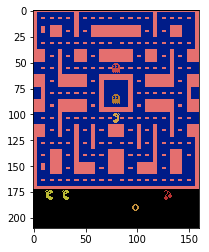

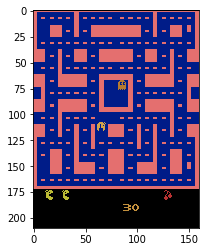

In [5]:
env.reset()
plt.figure()
plt.imshow(env.render(mode='rgb_array'))

[env.step(4) for x in range(100)]
plt.figure()
plt.imshow(env.render(mode='rgb_array'))

env.render(close=True)

**We may also want to crop the image to delete useless regions in the image, like the score information.**

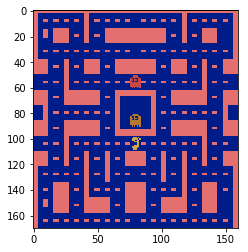

In [6]:
# Check out what a cropped image looks like
plt.imshow(observation[0:-40,:,:])

## Summary

The following content you can also read from the [official documention](https://gym.openai.com/docs/#observations) of Gym.

### For main functions

To choose the envrionment you want to use:

    env = gym.envs.make()
    
Some information about state and action space:
    
    action_space: The Space object corresponding to valid actions
    observation_space: The Space object corresponding to valid observations

The 3 core main API methods to use the env:
        
    env.reset()      # Get the initial state
    env.step(action) # The the action in action_space, then get the observation information
    env.render()     # Refresh the scene, not required when training to save time
    
### For observed informations returned by environment

The environment’s **step** function returns exactly what we need. In fact, **step** returns four values. These are:

- observation (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
- reward (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
- done (boolean): whether it’s time to **reset** the environment again. Most (but not all) tasks are divided up into well-defined episodes, and **done** being **True** indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
- info (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an action, and the environment returns an observation and a reward.

![](https://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

## Recode the video of playing the game.

If you want to know what is happenning in the game, you can use [Monitor](https://github.com/openai/gym/blob/master/gym/wrappers/monitor.py) to record the video.

In [7]:
import os
from gym.wrappers import Monitor

experiment_dir = "./experiment/"
if not os.path.exists(experiment_dir):
    os.makedirs(experiment_dir)

monitor_path = os.path.join(experiment_dir, "monitor/")
if not os.path.exists(monitor_path):
    os.makedirs(monitor_path)

env = gym.make('Breakout-v0')
# The frequency of recording the game
record_video_every = 5
env = Monitor(env, directory=monitor_path, video_callable=lambda count: count % record_video_every == 0, resume=True)
for i_episode in range(10):
    env.reset()
    t = 0
    while True:
        t = t + 1
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode {} finished after {} timesteps".format(i_episode, t+1))
            break

Episode 0 finished after 269 timesteps
Episode 1 finished after 236 timesteps
Episode 2 finished after 209 timesteps
Episode 3 finished after 338 timesteps
Episode 4 finished after 308 timesteps
Episode 5 finished after 169 timesteps
Episode 6 finished after 170 timesteps
Episode 7 finished after 240 timesteps
Episode 8 finished after 378 timesteps
Episode 9 finished after 175 timesteps


You can find the recorded video under the **monitor_path**.

## Add your new environment

Finally, you may want to use your own game environment and then make a contribution to this community. In this [page](https://github.com/openai/gym/tree/master/gym/envs), there are steps required for add your own environment into the architecture of OpenAI Gym. And from here, you can have a close look at what environemnts are offered by Gym.

When implementing an environment, override the following methods in your subclass:
    
    _step
    _reset
    _render